In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#from worldwealth import Person
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from numba import jit
import multiprocessing as mp

In [24]:
from worldwealth import World

In [25]:
try:
    os.remove('population.csv')
    os.remove('state.csv')
except:
    pass
world = World(
                 name= '1',
                 initial_population = 20,
                 years_until_extintion = 500,
                 allow_heritage = False,
                 wealth_distribution = False

                 )
world.create_world()

In [26]:
len(world.population)

20

In [27]:
world.run()

In [28]:
len(world.population)

280

In [29]:
cause_of_death = list()
for person in world.dead_population:
    cause_of_death.append(person.cause_of_death)

In [30]:
pd.Series(cause_of_death).value_counts().index[0]

'NATURAL'

In [31]:
data = pd.read_csv('population.csv', names= "id,age,money,children,Year".split(','))
data.head()

,id,age,money,children,Year
0,ea07b4cd-0f3f-4213-8a62-c1b390efb868,36,221.064024,0,0
1,de82a348-b5ef-46a9-89f5-32aff00717cc,36,21158.554581,1,0
2,8ea645c4-f31c-4c4a-b33e-ee0d25868efb,36,30291.956020,0,0
3,7fddf136-3981-48f5-86a9-50d29c2d768d,36,6181.490932,0,0
4,e8c8d75d-9506-4335-b780-810a8fe2ecee,36,15284.246188,0,0


In [32]:
state = pd.read_csv('state.csv', names= "money,Year".split(','))
state.head()

,money,Year
0,0.0,0
1,0.0,1
2,0.0,2
3,0.0,3
4,0.0,4


In [35]:
money

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
495    7.089971e+07
496    7.090029e+07
497    7.111313e+07
498    7.111313e+07
499    7.111313e+07
Name: money, Length: 500, dtype: float64

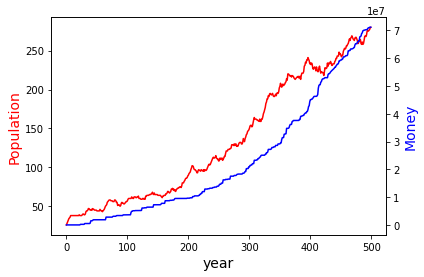

In [38]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(years, pop, color="red")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Population",color="red",fontsize=14)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(years, money,color="blue")
ax2.set_ylabel("Money",color="blue",fontsize=14)
plt.show()

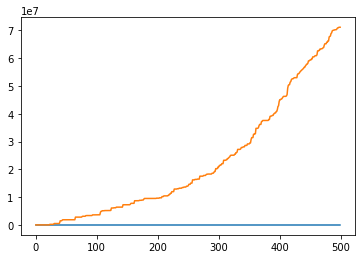

In [36]:
pop = data.groupby('Year').count().age#.plot()
money = state.money
years = state.Year
plt.figure()
plt.plot(years, pop)
plt.plot(years, money)
plt.show()

In [17]:
# population when dead
last_year_alive = data[['id', 'age']].groupby('id').max()#.plot.hist()

In [18]:
last_year_alive.age.mean()

32.90625

In [19]:
last_year_alive.age.median()

46.0

<AxesSubplot:xlabel='Year'>

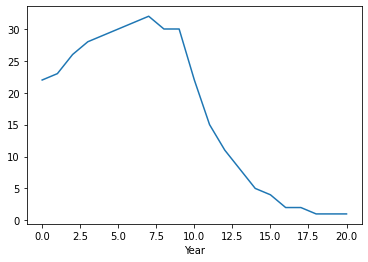

In [20]:
data.groupby('Year').count().age.plot()

In [60]:
data.iloc[data.money.idxmax()]#['age']

id          a57967ee-94a4-4a71-920a-9ba446ec0c18
age                                           44
money                                        inf
children                                       0
Year                                           8
Name: 224, dtype: object

<AxesSubplot:>

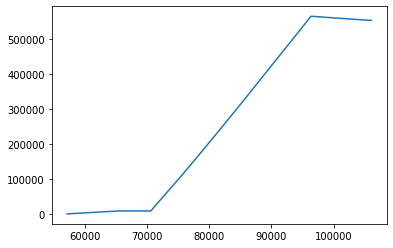

In [14]:
data[data.id == data.iloc[data.money.idxmax()].id].money.plot()

In [16]:
for person in world.population:
    if person.id == data.iloc[data.money.idxmax()].id:
        print(person.DNA)
        print(person.percentage_money_invest)
for person in world.dead_population:
    if person.id == data.iloc[data.money.idxmax()].id:
        print(person.DNA)
        print(person.percentage_money_invest)

{'STUDY': True, 'BABY': False, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.19987450551616515


In [7]:

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    # All values are treated equally, arrays must be 1d:
    array = array.flatten()
    if np.amin(array) < 0:
        # Values cannot be negative:
        array -= np.amin(array)
    # Values cannot be 0:
    array += 0.0000001
    # Values must be sorted:
    array = np.sort(array)
    # Index per array element:
    index = np.arange(1,array.shape[0]+1)
    # Number of array elements:
    n = array.shape[0]
    # Gini coefficient:
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

In [18]:
last_year = data[data.Year == 499].copy()

In [19]:
last_year = data[data.Year == 499].copy()
gini(last_year.money.values)

0.6796892644519581

<AxesSubplot:ylabel='Frequency'>

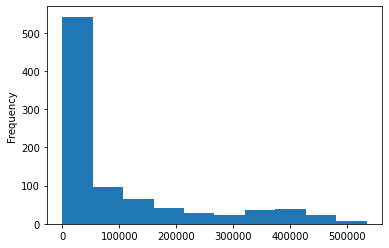

In [20]:
money = last_year.sort_values(by='money').money#
money.plot.hist()

In [21]:
percentage_total_money = money /(money.sum())
percentage_total_money = percentage_total_money[::-1]#[:100]
percentage_total_money

109605    0.006257
109635    0.005865
109533    0.005854
109522    0.005782
109530    0.005767
            ...   
110408    0.000000
110409    0.000000
110410    0.000000
110411    0.000000
110413    0.000000
Name: money, Length: 899, dtype: float64

In [25]:
ten_percente_population = int(len(money)*0.01)
money_10_percente = percentage_total_money[:ten_percente_population]
ten_percente_population

8

In [26]:
rich_person_index = money_10_percente.index

In [28]:
rich_people = data.iloc[rich_person_index]
rich_people

,id,age,money,children,Year
109605,932e1e2d-fabe-4bdb-a2d4-3fb586fcdcb1,69,534731.779969,0,499
109635,db4010ba-7295-4252-9d10-1bc3c9e1215e,66,501239.752137,1,499
109533,ce516d99-653d-4de0-9dac-1da226d52ad1,86,500315.034381,0,499
109522,a5a5f8b0-9f66-43ac-8aeb-e3d25f27c192,90,494102.951872,2,499
109530,b522f51f-8e40-4b27-9fff-f017425e4747,89,492847.370754,0,499
109523,d87d9467-dbc8-4f48-80d1-f576eb0ed8fb,89,491042.480130,0,499
109567,1452a117-2266-44e2-8fad-c9a9b8bdc971,78,489246.045689,0,499
109582,28333538-ef4a-4e98-b63d-f3f6d6c6659d,74,478461.391620,0,499


In [30]:
ids_rich = rich_people.sort_values(by='money', ascending= False).id.to_list()
ids_rich

['932e1e2d-fabe-4bdb-a2d4-3fb586fcdcb1',
 'db4010ba-7295-4252-9d10-1bc3c9e1215e',
 'ce516d99-653d-4de0-9dac-1da226d52ad1',
 'a5a5f8b0-9f66-43ac-8aeb-e3d25f27c192',
 'b522f51f-8e40-4b27-9fff-f017425e4747',
 'd87d9467-dbc8-4f48-80d1-f576eb0ed8fb',
 '1452a117-2266-44e2-8fad-c9a9b8bdc971',
 '28333538-ef4a-4e98-b63d-f3f6d6c6659d']

In [31]:
for person in world.population:
    if person.id in ids_rich:
        print(person.DNA)
        print(round(person.percentage_money_invest,2))

{'STUDY': True, 'BABY': True, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.2
{'STUDY': False, 'BABY': False, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.16
{'STUDY': False, 'BABY': False, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.16
{'STUDY': False, 'BABY': True, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.17
{'STUDY': True, 'BABY': False, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.09
{'STUDY': False, 'BABY': False, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.13
{'STUDY': True, 'BABY': False, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.16
{'STUDY': False, 'BABY': True, 'P_DEATH': False, 'INVEST': True, 'S_MONEY': 0.05}
0.17


In [32]:
money_10_percente.sum()

0.04659389625144762

In [33]:
data.age.max()

100

In [ ]:
data.age

In [ ]:
data.age.plot.hist()

In [ ]:
data.groupby('id').max()#.children.mean()

In [ ]:
last_year.money.where(last_year.money <0).dropna()

In [49]:
# PARAMETERS

In [ ]:
name= '1',
initial_population = 20,
years_until_extintion = 500,
allow_heritage = False,
wealth_distribution = False

In [54]:
data.tail(1).Year.values[0]

20

In [10]:
def simulation():
    aggregated_data = dict()
    try:
        os.remove('population.csv')
    except:
        pass
    world = World(
                     name= '1',
                     initial_population = 20,
                     years_until_extintion = 500,
                     allow_heritage = True,
                     wealth_distribution = False

                     )
    world.create_world()
    world.run()
    data = pd.read_csv('population.csv', names= "id,age,money,children,Year".split(','))
    aggregated_data['FINAL_POPULATION'] = len(world.population)
    aggregated_data['FINAL_YEAR'] = data.tail(1).Year.values[0]
    
    age_death = list() 
    for person in world.dead_population:
        age_death.append(person.age)
    age_death = pd.Series(age_death)
    
    aggregated_data['MEAN_AGE_DIE'] = age_death.mean()
    aggregated_data['MEDIAN_AGE_DIE'] = age_death.median()
    
    money_death = list() 
    for person in world.dead_population:
        money_death.append(person.money)
    money_death = pd.Series(money_death)
    
    aggregated_data['MEAN_MONEY_DIE'] = money_death.mean()
    aggregated_data['MEDIAN_MONEY_DIE'] = money_death.median()
    
    cause_of_death = list() 
    for person in world.dead_population:
        cause_of_death.append(person.cause_of_death)
    cause_of_death = pd.Series(cause_of_death).value_counts().index[0]
    
    aggregated_data['MOST_FREQUENT_DEAD_CAUSE'] = cause_of_death
    
    richest_person = data.iloc[data.money.idxmax()]
    
    aggregated_data['RICHEST_PERSON_AGE'] = richest_person['age']
    aggregated_data['RICHEST_PERSON_CHILDREN'] = richest_person['children']
    aggregated_data['RICHEST_PERSON_MONEY'] = richest_person['money']
    
    
    for person in world.population:
        if person.id == data.iloc[data.money.idxmax()].id:
            aggregated_data['RICHEST_PERSON_STUDY'] = person.DNA['STUDY']
            aggregated_data['RICHEST_PERSON_BABY'] = person.DNA['BABY']
            aggregated_data['RICHEST_PERSON_P_DEATH'] = person.DNA['P_DEATH']
            aggregated_data['RICHEST_PERSON_INVEST'] = person.DNA['INVEST']
            aggregated_data['RICHEST_PERSON_S_MONEY'] = person.DNA['S_MONEY']
            aggregated_data['RICHEST_PERSON_MONEY_INV'] = round(person.percentage_money_invest, 2)
    for person in world.dead_population:
        if person.id == data.iloc[data.money.idxmax()].id:
            aggregated_data['RICHEST_PERSON_STUDY'] = person.DNA['STUDY']
            aggregated_data['RICHEST_PERSON_BABY'] = person.DNA['BABY']
            aggregated_data['RICHEST_PERSON_P_DEATH'] = person.DNA['P_DEATH']
            aggregated_data['RICHEST_PERSON_INVEST'] = person.DNA['INVEST']
            aggregated_data['RICHEST_PERSON_S_MONEY'] = person.DNA['S_MONEY']
            aggregated_data['RICHEST_PERSON_MONEY_INV'] = round(person.percentage_money_invest, 2)
     
    last_year = data[data.Year == aggregated_data['FINAL_YEAR']].copy()
    
    gini_coef = gini(last_year.money.values)
    
    aggregated_data['GINI_ALIVE'] = gini_coef
    
    return aggregated_data
    
    
    

In [11]:
multi_sim_data = list()
for i in range(1):
    print(f'Sim: {i}')
    multi_sim_data.append(simulation())
    

Sim: 0


/home/tiago/Projects/WorldWealth/WorldWealth/worldwealth/person.py:93: RuntimeWarning: divide by zero encountered in double_scalars
  heritage_value = self.money / len(self.children)


In [12]:
aggregated_data_2 = pd.DataFrame(multi_sim_data)
aggregated_data_2

,FINAL_POPULATION,FINAL_YEAR,MEAN_AGE_DIE,MEDIAN_AGE_DIE,MEAN_MONEY_DIE,MEDIAN_MONEY_DIE,MOST_FREQUENT_DEAD_CAUSE,RICHEST_PERSON_AGE,RICHEST_PERSON_CHILDREN,RICHEST_PERSON_MONEY,RICHEST_PERSON_STUDY,RICHEST_PERSON_BABY,RICHEST_PERSON_P_DEATH,RICHEST_PERSON_INVEST,RICHEST_PERSON_S_MONEY,RICHEST_PERSON_MONEY_INV,GINI_ALIVE
0,2631,499,74.542256,76.0,936477.887051,932359.065584,NATURAL,61,0,3.988986e+06,False,False,False,True,0.05,0.18,0.667067


In [35]:
categorical_features = ['MOST_FREQUENT_DEAD_CAUSE','RICHEST_PERSON_STUDY','RICHEST_PERSON_BABY','RICHEST_PERSON_P_DEATH','RICHEST_PERSON_INVEST']

In [39]:
numeric_features = aggregated_data_2.columns.drop(categorical_features)

In [40]:
numeric = aggregated_data_2[numeric_features].copy()
categorical= aggregated_data_2[categorical_features].copy()

In [41]:
numeric.mean()

FINAL_POPULATION            9.760900e+02
FINAL_YEAR                  4.304100e+02
MEAN_AGE_DIE                7.512279e+01
MEDIAN_AGE_DIE              7.647500e+01
MEAN_MONEY_DIE              3.014996e+05
MEDIAN_MONEY_DIE            2.859990e+05
RICHEST_PERSON_AGE          6.455000e+01
RICHEST_PERSON_CHILDREN     8.600000e-01
RICHEST_PERSON_MONEY        1.316035e+06
RICHEST_PERSON_S_MONEY      1.620000e-01
RICHEST_PERSON_MONEY_INV    1.394000e-01
GINI_ALIVE                  5.090622e-01
dtype: float64

In [44]:
categorical#.value_counts()

,MOST_FREQUENT_DEAD_CAUSE,RICHEST_PERSON_STUDY,RICHEST_PERSON_BABY,RICHEST_PERSON_P_DEATH,RICHEST_PERSON_INVEST
0,NATURAL,False,False,False,True
1,NATURAL,True,True,False,True
2,NATURAL,False,False,False,True
3,NATURAL,False,True,False,True
4,NATURAL,False,False,False,True
...,...,...,...,...,...
95,NATURAL,True,False,False,True
96,NATURAL,False,True,False,True
97,NATURAL,True,True,False,True
98,NATURAL,False,False,False,True


In [31]:
com = aggregated_data_2.mean()
com

FINAL_POPULATION            9.760900e+02
FINAL_YEAR                  4.304100e+02
MEAN_AGE_DIE                7.512279e+01
MEDIAN_AGE_DIE              7.647500e+01
MEAN_MONEY_DIE              3.014996e+05
MEDIAN_MONEY_DIE            2.859990e+05
RICHEST_PERSON_AGE          6.455000e+01
RICHEST_PERSON_CHILDREN     8.600000e-01
RICHEST_PERSON_MONEY        1.316035e+06
RICHEST_PERSON_STUDY        2.300000e-01
RICHEST_PERSON_BABY         3.900000e-01
RICHEST_PERSON_P_DEATH      1.000000e-02
RICHEST_PERSON_INVEST       1.000000e+00
RICHEST_PERSON_S_MONEY      1.620000e-01
RICHEST_PERSON_MONEY_INV    1.394000e-01
GINI_ALIVE                  5.090622e-01
dtype: float64

In [27]:
aggregated_data_2

,FINAL_POPULATION,FINAL_YEAR,MEAN_AGE_DIE,MEDIAN_AGE_DIE,MEAN_MONEY_DIE,MEDIAN_MONEY_DIE,MOST_FREQUENT_DEAD_CAUSE,RICHEST_PERSON_AGE,RICHEST_PERSON_CHILDREN,RICHEST_PERSON_MONEY,RICHEST_PERSON_STUDY,RICHEST_PERSON_BABY,RICHEST_PERSON_P_DEATH,RICHEST_PERSON_INVEST,RICHEST_PERSON_S_MONEY,RICHEST_PERSON_MONEY_INV,GINI_ALIVE
0,2011,499,75.496056,77.0,299502.681918,298903.163844,NATURAL,49,0,8.377908e+05,False,False,False,True,0.20,0.15,0.537198
1,0,150,74.846154,74.0,252689.788532,175179.441863,NATURAL,66,0,8.777686e+05,False,True,False,True,0.20,0.18,0.000000
2,229,499,76.129909,78.0,309220.653673,314680.193654,NATURAL,58,0,8.041991e+05,False,False,False,True,0.05,0.15,0.563454
3,1504,499,75.435432,77.5,305132.443699,299266.567768,NATURAL,56,0,1.038745e+06,False,True,False,True,0.05,0.13,0.548085
4,0,405,79.950000,80.5,281027.866441,272137.403214,NATURAL,66,0,7.109223e+05,True,False,False,True,0.05,0.19,0.000000
5,0,74,74.363636,74.0,157361.271826,125985.962007,NATURAL,66,0,5.708592e+05,True,False,False,True,0.05,0.08,0.000000
6,1497,499,74.620956,77.0,306987.941103,311986.937489,NATURAL,63,0,9.472459e+05,True,False,False,True,0.05,0.10,0.548273
7,0,270,75.583333,79.0,291000.206737,219367.205755,NATURAL,66,0,6.614407e+05,False,False,False,True,0.05,0.20,0.000000
8,682,499,76.829819,78.5,317360.254181,326110.320351,NATURAL,63,0,9.068413e+05,False,False,False,True,0.05,0.13,0.565196
9,1681,499,75.067528,77.0,291144.896856,285599.803285,NATURAL,69,0,9.750485e+05,False,False,False,True,0.20,0.18,0.559956


In [ ]:
def death_population_indicators(world, feature):
    age_death = list() 
    for person in world.dead_population:
        age_death.append(person[feature])
    age_death = pd.Series(age_death)
    return age_death.mean(), age_death.median()
    

In [19]:
sem

FINAL_POPULATION               503.750000
FINAL_YEAR                     415.050000
MEAN_AGE_DIE                    73.000515
MEDIAN_AGE_DIE                  74.525000
MEAN_MONEY_DIE              199493.819524
MEDIAN_MONEY_DIE            160707.798337
RICHEST_PERSON_AGE              66.000000
RICHEST_PERSON_CHILDREN          0.050000
RICHEST_PERSON_MONEY        543722.264492
RICHEST_PERSON_STUDY             0.850000
RICHEST_PERSON_BABY              0.100000
RICHEST_PERSON_P_DEATH           0.000000
RICHEST_PERSON_INVEST            1.000000
RICHEST_PERSON_S_MONEY           0.057500
RICHEST_PERSON_MONEY_INV         0.182000
GINI_ALIVE                       0.499640
dtype: float64